In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('Dallas data summary.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,117.37315,5.93,37170,5816.407,5.3,284456.508,1254.0813,43.20%,133706,2.30%,4281,4.19,188.9
1,4/1/2005,118.36502,5.86,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,5548,4.69,196.6
2,5/1/2005,119.47166,5.72,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,4878,4.58,196.6
3,6/1/2005,120.02775,5.58,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134186,2.30%,5304,4.83,196.6
4,7/1/2005,120.82903,5.70,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134032,2.30%,5140,5.06,196.6
5,8/1/2005,121.15007,5.82,39903,5999.411,5.2,307562.122,1254.0813,43.40%,134032,2.30%,6042,4.36,196.6
6,9/1/2005,121.62157,5.77,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134032,2.30%,4361,4.39,196.6
7,10/1/2005,121.66380,6.07,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,4814,4.45,196.6
8,11/1/2005,122.11284,6.33,39903,5999.411,5.0,307562.122,1254.0813,43.20%,134539,2.50%,4713,4.34,196.6
9,12/1/2005,122.20399,6.27,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,5458,4.32,196.6


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,117.37315,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.9,43.2,2.3
1,4/1/2005,118.36502,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.6,43.4,2.3
2,5/1/2005,119.47166,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.6,43.4,2.3
3,6/1/2005,120.02775,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.6,43.4,2.3
4,7/1/2005,120.82903,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.6,43.4,2.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.900,43.2,2.3
1,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.600,43.4,2.3
2,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.600,43.4,2.3
3,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.600,43.4,2.3
4,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.600,43.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,56864,7455.756,3.9,505768.515,774.6436,142486,6620,3.91,225.753,34.7,1.2
150,3.81,56864,7455.756,3.5,505768.515,774.6436,142486,4446,4.15,225.753,34.7,1.2
151,3.90,56864,7455.756,3.3,505768.515,774.6436,144208,6459,4.03,225.753,34.5,1.4
152,3.92,56864,7455.756,3.4,505768.515,774.6436,144208,3754,3.73,225.753,34.5,1.4


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.9125,4.4300,5.8500,6.760000e+00
Personal_Income,154.0,46623.922078,5353.954117,37170.0000,41319.0000,46644.0000,50670.0000,5.686400e+04
Resident_Population,154.0,6700.461175,438.933181,5816.4070,6392.0650,6644.5590,7042.5660,7.455756e+03
Unemployment_Rate,154.0,5.522078,1.552070,3.3000,4.1000,5.1500,6.7750,8.700000e+00
GDP,154.0,483064.876838,359241.068443,284456.5080,336217.2700,374743.3120,435857.5220,1.699894e+06
Crime_Rate,154.0,827.867606,197.670919,663.7371,681.1003,762.4122,894.8343,1.254081e+03
Median_Debt,154.0,133590.344156,3943.704187,127063.0000,130171.7500,134355.0000,136181.0000,1.442080e+05
New_Structures,154.0,3387.207792,1389.015967,1098.0000,2245.7500,3325.5000,4372.2500,7.374000e+03
Economic_Conditions_Index,154.0,3.324026,2.089403,-4.4600,3.5300,4.0100,4.4050,5.220000e+00
CPI all items less shelter,154.0,215.194461,9.368599,188.9000,209.4070,219.7360,221.2480,2.257530e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.765783,-2.014097,-0.143085,-0.552855,2.156178,0.029327,0.643472,0.414460,-2.806659,0.897068,-0.534035
1,1.051011,-1.255319,-1.597168,-0.271945,-0.488538,2.156178,0.151040,1.555628,0.653763,-1.984764,0.959805,-0.534035
2,0.916107,-1.255319,-1.597168,-0.271945,-0.488538,2.156178,0.151040,1.073272,0.601116,-1.984764,0.959805,-0.534035
3,0.781203,-1.255319,-1.597168,-0.078655,-0.488538,2.156178,0.151040,1.379964,0.720768,-1.984764,0.959805,-0.534035
4,0.896835,-1.255319,-1.597168,-0.078655,-0.488538,2.156178,0.111990,1.261895,0.830847,-1.984764,0.959805,-0.534035
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,1.912620,1.720751,-1.045106,0.063199,-0.269256,2.255660,2.327397,0.280450,1.127014,-1.769285,-1.642683
150,-0.924366,1.912620,1.720751,-1.302827,0.063199,-0.269256,2.255660,0.762261,0.395316,1.127014,-1.769285,-1.642683
151,-0.837642,1.912620,1.720751,-1.431687,0.063199,-0.269256,2.692305,2.211488,0.337883,1.127014,-1.832022,-1.441110
152,-0.818370,1.912620,1.720751,-1.367257,0.063199,-0.269256,2.692305,0.264066,0.194301,1.127014,-1.832022,-1.441110


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

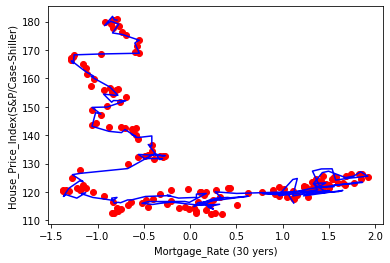

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.1
Accuracy: 98.32 %.


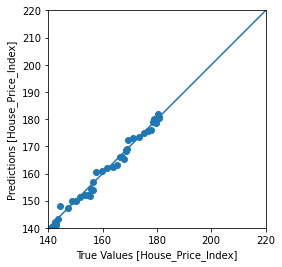

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9820100405199843

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,1.404345
1,-1.807758
2,13.176461
3,1.827246
4,0.220272
5,4.333809
6,4.986191
7,0.654936
8,0.326035
9,-1.644407


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[116.11024613 119.62444122 119.10191278 119.50552436 119.43176447
 119.67476579 118.70144615 119.91844936 120.44095965 120.4724619
 122.92360794 126.839078   127.33779398 125.09248947 125.58232441
 127.1295468  125.59291545 124.75289878 124.22209475 128.18468905
 128.13704388 127.36945761 122.04103626 123.23608084 122.98250689
 121.48410792 121.7841904  123.48259072 123.40366981 122.86435775
 122.45972757 121.85641319 121.67678287 121.09085032 118.88987341
 124.41927644 124.76723362 118.62273685 119.27154491 119.93655727
 120.14024092 120.56639655 118.65168636 120.85912833 120.26579772
 119.50160864 120.078454   117.6246558  117.37649389 114.84404414
 116.25538292 118.52257999 117.97105827 118.09721517 117.85786596
 115.85799428 115.67885738 115.82905389 114.00245334 114.36631071
 114.78043217 115.68591672 115.32126758 115.79924879 116.44255177
 116.00575615 115.61980372 116.03019293 116.63081171 116.67774485
 116.34572155 119.50157411 119.27092611 118.1059686  117.86873342
 118.845348

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,116.110246
1,119.624441
2,119.101913
3,119.505524
4,119.431764
...,...
149,180.143147
150,178.589888
151,181.884089
152,180.706633


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.765783,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,...,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620
Resident_Population,-2.014097,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,...,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751
Unemployment_Rate,-0.143085,-0.271945,-0.271945,-0.078655,-0.078655,-0.207515,-0.271945,-0.465235,-0.336375,-0.465235,...,-1.045106,-1.302827,-1.238396,-1.045106,-1.045106,-1.045106,-1.302827,-1.431687,-1.367257,-1.431687
GDP,-0.552855,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,...,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199
Crime_Rate,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,...,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256
Median_Debt,0.029327,0.151040,0.151040,0.151040,0.111990,0.111990,0.111990,0.240549,0.240549,0.240549,...,1.325824,1.785797,1.785797,1.785797,2.255660,2.255660,2.255660,2.692305,2.692305,2.692305
New_Structures,0.643472,1.555628,1.073272,1.379964,1.261895,1.911276,0.701066,1.027196,0.954483,1.490834,...,2.166852,0.588757,1.157504,1.635541,0.621154,2.327397,0.762261,2.211488,0.264066,0.175514
Economic_Conditions_Index,0.414460,0.653763,0.601116,0.720768,0.830847,0.495823,0.510181,0.538897,0.486251,0.476679,...,0.290023,0.175157,0.213446,0.294809,0.208660,0.280450,0.395316,0.337883,0.194301,0.103366
CPI all items less shelter,-2.806659,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,...,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.765783,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,-1.255319,...,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620,1.912620
2,Resident_Population,-2.014097,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,-1.597168,...,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751,1.720751
3,Unemployment_Rate,-0.143085,-0.271945,-0.271945,-0.078655,-0.078655,-0.207515,-0.271945,-0.465235,-0.336375,...,-1.045106,-1.302827,-1.238396,-1.045106,-1.045106,-1.045106,-1.302827,-1.431687,-1.367257,-1.431687
4,GDP,-0.552855,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,-0.488538,...,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199,0.063199
5,Crime_Rate,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,2.156178,...,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256,-0.269256
6,Median_Debt,0.029327,0.151040,0.151040,0.151040,0.111990,0.111990,0.111990,0.240549,0.240549,...,1.325824,1.785797,1.785797,1.785797,2.255660,2.255660,2.255660,2.692305,2.692305,2.692305
7,New_Structures,0.643472,1.555628,1.073272,1.379964,1.261895,1.911276,0.701066,1.027196,0.954483,...,2.166852,0.588757,1.157504,1.635541,0.621154,2.327397,0.762261,2.211488,0.264066,0.175514
8,Economic_Conditions_Index,0.414460,0.653763,0.601116,0.720768,0.830847,0.495823,0.510181,0.538897,0.486251,...,0.290023,0.175157,0.213446,0.294809,0.208660,0.280450,0.395316,0.337883,0.194301,0.103366
9,CPI all items less shelter,-2.806659,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,-1.984764,...,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014,1.127014


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),1.404345
1,Personal_Income,-1.807758
2,Resident_Population,13.176461
3,Unemployment_Rate,1.827246
4,GDP,0.220272
5,Crime_Rate,4.333809
6,Median_Debt,4.986191
7,New_Structures,0.654936
8,Economic_Conditions_Index,0.326035
9,CPI all items less shelter,-1.644407


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

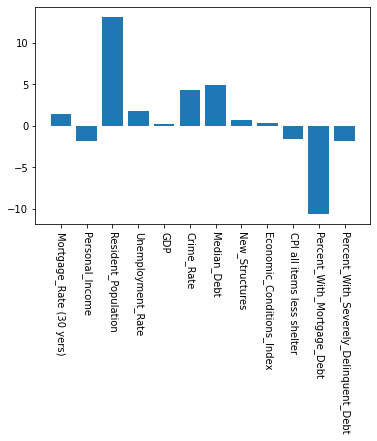

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2018,181.23406,4.03,56864,7455.756,3.7,505768.515,764.9371,34.70%,145761,1.30%,5687,3.46,225.753
1,2/1/2018,182.28582,4.33,58725,7573.136,3.7,523861.973,764.9371,34.70%,145761,1.30%,3979,3.59,228.881
2,3/1/2018,183.58835,4.44,58725,7573.136,3.6,523861.973,764.9371,34.70%,145761,1.30%,4814,3.72,228.881
3,4/1/2018,185.27276,4.47,58725,7573.136,3.3,523861.973,764.9371,34.50%,147349,1.10%,8213,3.81,228.881
4,5/1/2018,186.42279,4.59,58725,7573.136,3.3,523861.973,764.9371,34.50%,147349,1.10%,4805,4.16,228.881
5,6/1/2018,187.15900,4.57,58725,7573.136,3.9,523861.973,764.9371,34.50%,147349,1.10%,5813,4.25,228.881
6,7/1/2018,187.50014,4.53,58725,7573.136,3.7,523861.973,764.9371,34.40%,150174,1.10%,5275,4.22,228.881
7,8/1/2018,187.43342,4.55,58725,7573.136,3.6,523861.973,764.9371,34.40%,150174,1.10%,5416,4.18,228.881
8,9/1/2018,187.42928,4.63,58725,7573.136,3.4,523861.973,764.9371,34.40%,150174,1.10%,4336,4.02,228.881
9,10/1/2018,187.49068,4.83,58725,7573.136,3.3,523861.973,764.9371,34.00%,151486,1.10%,4505,4.09,228.881


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,181.23406,4.03,56864,7455.756,3.7,505768.515,764.9371,145761,5687,3.46,225.753,34.7,1.3
1,2/1/2018,182.28582,4.33,58725,7573.136,3.7,523861.973,764.9371,145761,3979,3.59,228.881,34.7,1.3
2,3/1/2018,183.58835,4.44,58725,7573.136,3.6,523861.973,764.9371,145761,4814,3.72,228.881,34.7,1.3
3,4/1/2018,185.27276,4.47,58725,7573.136,3.3,523861.973,764.9371,147349,8213,3.81,228.881,34.5,1.1
4,5/1/2018,186.42279,4.59,58725,7573.136,3.3,523861.973,764.9371,147349,4805,4.16,228.881,34.5,1.1


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,56864,7455.756,3.7,505768.515,764.9371,145761,5687,3.46,225.753,34.7,1.3
1,4.33,58725,7573.136,3.7,523861.973,764.9371,145761,3979,3.59,228.881,34.7,1.3
2,4.44,58725,7573.136,3.6,523861.973,764.9371,145761,4814,3.72,228.881,34.7,1.3
3,4.47,58725,7573.136,3.3,523861.973,764.9371,147349,8213,3.81,228.881,34.5,1.1
4,4.59,58725,7573.136,3.3,523861.973,764.9371,147349,4805,4.16,228.881,34.5,1.1
5,4.57,58725,7573.136,3.9,523861.973,764.9371,147349,5813,4.25,228.881,34.5,1.1
6,4.53,58725,7573.136,3.7,523861.973,764.9371,150174,5275,4.22,228.881,34.4,1.1
7,4.55,58725,7573.136,3.6,523861.973,764.9371,150174,5416,4.18,228.881,34.4,1.1
8,4.63,58725,7573.136,3.4,523861.973,764.9371,150174,4336,4.02,228.881,34.4,1.1
9,4.83,58725,7573.136,3.3,523861.973,764.9371,151486,4505,4.09,228.881,34.0,1.1


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000,0.220289,4.0300,4.4625,4.5600,4.6325,4.8700
Personal_Income,12.0,58569.916667,537.224425,56864.0000,58725.0000,58725.0000,58725.0000,58725.0000
Resident_Population,12.0,7563.354333,33.884687,7455.7560,7573.1360,7573.1360,7573.1360,7573.1360
Unemployment_Rate,12.0,3.500000,0.225630,3.2000,3.3000,3.5000,3.7000,3.9000
GDP,12.0,522354.184833,5223.131423,505768.5150,523861.9730,523861.9730,523861.9730,523861.9730
Crime_Rate,12.0,764.937100,0.000000,764.9371,764.9371,764.9371,764.9371,764.9371
Median_Debt,12.0,148692.500000,2358.572507,145761.0000,146952.0000,148761.5000,150502.0000,151486.0000
New_Structures,12.0,5155.166667,1129.571587,3979.0000,4462.7500,4867.0000,5483.7500,8213.0000
Economic_Conditions_Index,12.0,3.956667,0.258750,3.4600,3.7875,4.0350,4.1650,4.2500
CPI all items less shelter,12.0,228.620333,0.902976,225.7530,228.8810,228.8810,228.8810,228.8810


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,1.912620,1.720751,-1.173966,0.063199,-0.31836,3.086098,1.655699,0.065078,1.127014,-1.769285,-1.541896
1,-0.423295,2.260213,1.988172,-1.173966,0.113565,-0.31836,3.086098,0.426051,0.127297,1.460895,-1.769285,-1.541896
2,-0.317299,2.260213,1.988172,-1.238396,0.113565,-0.31836,3.086098,1.027196,0.189515,1.460895,-1.769285,-1.541896
3,-0.288391,2.260213,1.988172,-1.431687,0.113565,-0.31836,3.488765,3.474253,0.232590,1.460895,-1.832022,-1.743469
4,-0.172759,2.260213,1.988172,-1.431687,0.113565,-0.31836,3.488765,1.020717,0.400102,1.460895,-1.832022,-1.743469
5,-0.192031,2.260213,1.988172,-1.045106,0.113565,-0.31836,3.488765,1.746411,0.443176,1.460895,-1.832022,-1.743469
6,-0.230575,2.260213,1.988172,-1.173966,0.113565,-0.31836,4.205096,1.359086,0.428818,1.460895,-1.863391,-1.743469
7,-0.211303,2.260213,1.988172,-1.238396,0.113565,-0.31836,4.205096,1.460597,0.409674,1.460895,-1.863391,-1.743469
8,-0.134215,2.260213,1.988172,-1.367257,0.113565,-0.31836,4.205096,0.683068,0.333097,1.460895,-1.863391,-1.743469
9,0.058504,2.260213,1.988172,-1.431687,0.113565,-0.31836,4.537778,0.804737,0.366599,1.460895,-1.988867,-1.743469


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[183.3428556  185.32112376 185.76624604 190.12073768 188.73082962
 189.89946962 193.25900445 193.22858073 192.56718083 195.81236616
 195.93820095 195.33885331]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,183.342856
1,185.321124
2,185.766246
3,190.120738
4,188.730830
5,189.899470
6,193.259004
7,193.228581
8,192.567181
9,195.812366
